Penney Ante Probabilities

In [1]:
import random
import matplotlib.pyplot as plt
plt.style.use("seaborn-colorblind")

def game(x):
    pa = []
    options = ['H','T']
    for i in range(x):
        pa.append(random.choice(options))
    pas = ''.join(pa)
    triplet = []
    for j in range(len(pas)-2):
        triplet.append(pas[j:j+3])
    unique_triplets = set(triplet)
    triplet_count = []
    for k in unique_triplets:
        if k in triplet:
            triplet_count.append(triplet.count(k))
    tripzip = zip(unique_triplets, triplet_count)
    tripdict = dict(tripzip)
    plt.bar(range(len(tripdict)), tripdict.values(), align='center')
    plt.xticks(range(len(tripdict)), tripdict.keys(), rotation='45')
    plt.title("Histogram of Triplet Usage")
    plt.ylabel("Triplet Count")
    plt.show()
    return tripdict

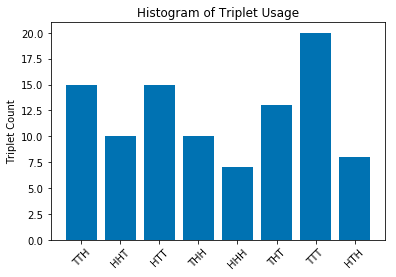

{'HHH': 7,
 'HHT': 10,
 'HTH': 8,
 'HTT': 15,
 'THH': 10,
 'THT': 13,
 'TTH': 15,
 'TTT': 20}

In [30]:
game(100)

In [71]:
def first(x):
    import random
    first_unique = [['HHH','HHT','HTH','HTT','THH','THT','TTH','TTT']]
    for _ in range(x):
        pa = []
        triplet = []
        unique_triplet = ['HHH','HHT','HTH','HTT','THH','THT','TTH','TTT']
        options = ['H','T']
        for i in range(100):
            pa.append(random.choice(options))
            pas = ''.join(pa)
        for j in range(len(pas)-2):
            triplet.append(pas[j:j+3])
        unique_list = []
        for i in unique_triplet:
            unique_list.append(triplet.index(i)+1)
        first_unique.append(unique_list)
    return first_unique


In [73]:
first(8)

{'HHH': [10, 11, 8, 2, 9, 1, 6, 3],
 'HHT': [14, 16, 1, 3, 13, 2, 7, 4],
 'HTH': [1, 3, 4, 9, 7, 5, 10, 17],
 'HTT': [8, 2, 6, 3, 1, 5, 4, 22],
 'THH': [4, 5, 6, 12, 3, 25, 2, 1],
 'THT': [6, 3, 1, 16, 2, 18, 17, 35],
 'TTH': [8, 2, 20, 3, 1, 15, 6, 4],
 'TTT': [9, 10, 23, 2, 8, 1, 3, 6]}

In [59]:
import random
lost = []
for _ in range(10):
    ls = []
    op = ['A','B']
    ls.append(random.choice(op))
    lstr = ''.join(ls)
    lost.append(lstr)
print(ls)
print(lstr)
print(lost)

['B']
B
['B', 'A', 'B', 'A', 'A', 'A', 'B', 'A', 'A', 'B']


In [80]:
import numpy as np
a = ['x','y','z']
b = [1,2,3]
c = [4,5,6]
d = np.array([a,b,c])
print(d)

[['x' 'y' 'z']
 ['1' '2' '3']
 ['4' '5' '6']]
